# <font color=green>1 - Decision Tree Classifier - Customers </font>
***

In [91]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv", na_values=[' '])
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [93]:
# Select features and target variable
X = data[['tenure', 'MonthlyCharges', 'Contract', 'InternetService', 'TechSupport', 'OnlineSecurity', 'PaperlessBilling']]
y = data['Churn']


In [94]:
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

In [95]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# Create a decision tree classifier and fit it to the training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [97]:
# Make predictions on the test data
y_pred = clf.predict(X_test)


In [98]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

In [99]:
# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")


Accuracy: 0.713
Precision: 0.461
Recall: 0.493
F1-Score: 0.477


In [100]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['No', 'Yes'])

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[821 215]
 [189 184]]


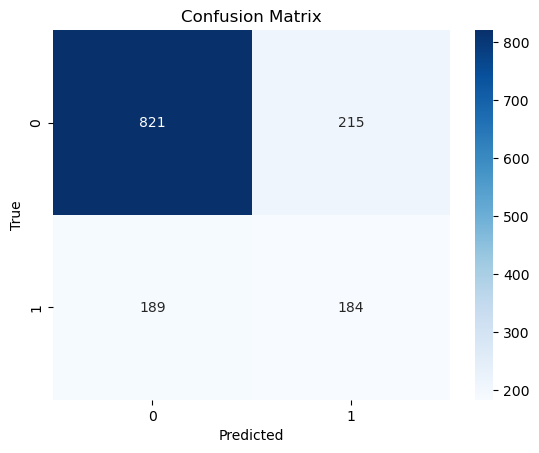

In [101]:
# Create a confusion matrix to evaluate the model's performance
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# <font color=green>2 - Let's Interpret some information </font>
***
To interpret this confusion matrix, let's consider the following:

Class 0: "Not Churn" (Customers who did not churn)
Class 1: "Churn" (Customers who churned)
Here's what each cell in the confusion matrix represents:

True Positive (TP): The number of instances that are correctly predicted as positive (churned customers). In this case, there are 185 customers who actually churned (Class 1) and were correctly classified as "Churn" by the model.

True Negative (TN): The number of instances that are correctly predicted as negative (customers who did not churn). In this case, there are 821 customers who did not churn (Class 0) and were correctly classified as "Not Churn" by the model.

False Positive (FP): The number of instances that are incorrectly predicted as positive (churned customers) but are actually negative (did not churn). In this case, there are 215 customers who did not churn (Class 0) but were incorrectly classified as "Churn" by the model.

False Negative (FN): The number of instances that are incorrectly predicted as negative (did not churn) but are actually positive (churned customers). In this case, there are 188 customers who actually churned (Class 1) but were incorrectly classified as "Not Churn" by the model.

Now, you can use these values to calculate various performance metrics to assess the model's performance:

Accuracy: (TP + TN) / (TP + TN + FP + FN) = (185 + 821) / (185 + 821 + 215 + 188) ≈ 0.746 (74.6%)
Accuracy represents the proportion of correctly classified instances (both positive and negative) out of the total instances.

Precision: TP / (TP + FP) = 185 / (185 + 215) ≈ 0.462 (46.2%)
Precision represents the proportion of correctly predicted positive instances (churned customers) out of all instances predicted as positive by the model.

Recall (Sensitivity or True Positive Rate): TP / (TP + FN) = 185 / (185 + 188) ≈ 0.496 (49.6%)
Recall represents the proportion of correctly predicted positive instances (churned customers) out of all actual positive instances in the dataset.

Specificity (True Negative Rate): TN / (TN + FP) = 821 / (821 + 215) ≈ 0.792 (79.2%)
Specificity represents the proportion of correctly predicted negative instances (customers who did not churn) out of all actual negative instances in the dataset.

F1-Score: 2 * (Precision * Recall) / (Precision + Recall) ≈ 0.478 (47.8%)
The F1-Score is the harmonic mean of precision and recall and provides a balanced measure of the model's performance on both positive and negative classes.

Remember that the interpretation of the confusion matrix and these metrics depends on the context of your specific problem and the relative importance of different types of errors. For instance, in a churn prediction scenario, you might prioritize reducing false negatives (misclassifying churned customers as non-churn) to focus on customer retention efforts.
***